In [3]:
import tensorflow as tf

# Import Tensor Flow MNIST dataset

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets('official/mnist/dataset.py',one_hot=True)

Extracting official/mnist/dataset.py\train-images-idx3-ubyte.gz
Extracting official/mnist/dataset.py\train-labels-idx1-ubyte.gz
Extracting official/mnist/dataset.py\t10k-images-idx3-ubyte.gz
Extracting official/mnist/dataset.py\t10k-labels-idx1-ubyte.gz


In [7]:
mnist.train.images.shape

(55000, 784)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
sample = mnist.train.images[0].reshape(28,28)

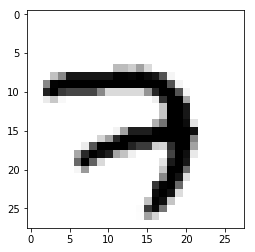

In [10]:
plt.imshow(sample,cmap = 'Greys')

# Hyper Parameters

In [11]:
learning_rate = 0.001 #how quickly the network will learn
training_epochs = 15   #how many cycles to go through
batch_size = 100  #batch size for training data(http://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network)

# Parameters for a Neural network

In [12]:
n_hidden_lay_1 = 256 # 2 hidden layers
n_hidden_lay_2 = 256
n_input = 784     #each digit is represents by 784 ie 28 X 28 pixels
n_samples = mnist.train.num_examples   #55000 records
n_classes = 10 #total digits 0-9

# Two Layer Neural network

In [13]:
def multilayer_percerptron(x,weights,biases):
    
    # multiply input with weights and add it to the bias
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # RELU activation function is applied to layer 1
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    out_layer = tf.add(tf.matmul(layer_2,weights['out']),biases['out'])
    
    return out_layer

# Initializing values for weights and biases (Random at first)

In [14]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_lay_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_lay_1,n_hidden_lay_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_lay_2,n_classes]))
}
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_lay_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_lay_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [15]:
x = tf.placeholder("float",[None,n_input])
y = tf.placeholder("float",[None,n_classes])

In [16]:
pred = multilayer_percerptron(x,weights,biases)

# Defining cost function and using ADAM optimizer for optimization function

In [18]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [19]:
init = tf.global_variables_initializer()

# Running the TF session

In [20]:
sess = tf.InteractiveSession()
sess.run(init)

In [21]:
for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        avg_cost += c / total_batch
    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))
print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=149.1855
Epoch: 2 cost=37.8804
Epoch: 3 cost=23.3371
Epoch: 4 cost=15.9497
Epoch: 5 cost=11.3832
Epoch: 6 cost=8.3481
Epoch: 7 cost=6.1435
Epoch: 8 cost=4.5317
Epoch: 9 cost=3.3530
Epoch: 10 cost=2.4902
Epoch: 11 cost=1.9117
Epoch: 12 cost=1.3833
Epoch: 13 cost=1.0156
Epoch: 14 cost=0.7739
Epoch: 15 cost=0.7002
Model has completed 15 Epochs of Training


# Model Evaluation

In [22]:
# Test model
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [23]:
correct_predictions = tf.cast(correct_predictions, "float")

In [24]:
accuracy = tf.reduce_mean(correct_predictions)

In [25]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9427
